2.2 Video Game Sales 电子游戏销售分析
数据集：Video Game Sales

该数据集包含游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据。

数据量：11列共1.66W数据。

基于这个数据集，可进行以下问题的探索：

电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；
预测每年电子游戏销售额。
可视化应用：如何完整清晰地展示这个销售故事。
也可以自行发现其他问题，并进行相应的挖掘。



<h1 style="text-align:center;vertical-align:middle">电子游戏销售分析</h1>
  
<div style="text-align:center;vertical-align:middle;margin-top:20px"><a  href = "https://github.com/PluckySaltyfish/DataMiningClass/Assignment9">仓库地址点这里</a></div>

## 目录
- [1 数据概要与预处理](#1)
    - [数据概要](#1.1)
    - [缺失值处理](#1.2)
    - [数据筛选](#1.3)
- [2 市场分析](#2)
    - [2.1 最受欢迎的游戏类型](#2.1)
    - [2.2 最受欢迎的游戏平台](#2.2)
    - [2.3 最受欢迎的游戏厂商](#2.3)
- [3 现象挖掘](#3)
    - [3.1 10年间大众喜好的变化](#3.1)
    - [3.2 10年间游戏平台的更替](#3.2)
    - [3.3 Nintendo10年来的开发思路转变](#3.3)
- [4 销售量预测](#4)

<h2 id="1">1 数据概要与预处理</h2>
<h3 id="1.1">数据概要</h3>

该数据描述了全球发行量超过100000的电子游戏的销售数据。应该是截止到2016年的数据，但是由于有些游戏的预购，所以该清单还包括预发售（在当时）的一些游戏。
  
**注意** 这里所有的`Sales`指的是销售量而不是老师简介里写的销售额，因为kaggle的描述中的第一句话”video games with sales greater than 100,000 copies“，说明了这里的sale指的是copy，也就是销售的份数。
- `Rank` 总销售量的排名
- `Name` 游戏的名字
- `Platform` 发行平台
- `Year` 发行时间
- `Genre` 游戏种类
- `Publisher` 发行商
- `NA_Sales` 北美的销售量，单位为百万，下同
- `EU_Sales` 欧洲的销售量
- `JP_Sales` 日本的销售量
- `Other_Sales` 其它地区的销售量
- `Global_Sales` 全球的销售量

In [4]:
import numpy as np
import pandas as pd
root = "/root/data"
def load_data(path,filename,col):
    df = pd.read_csv(path + '/' + filename,index_col =col)
    return df

In [38]:
vgs = load_data(root,"vgsales.csv","Rank")

In [47]:
vgs.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
vgs.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

数据有10列，发行时间与发行商有缺失值。
<h3 id="1.2">缺失值处理</h3>

 - `发行时间`
  
  发行时间的缺失值处理方式如下：由于游戏主机的市场欢迎度受时间影响，由于硬件更新或新的主机发售，导致上个世代的主机便不再风靡，而一个主机上的游戏发行量最高的时期，也恰恰是该主机最风靡的时期，由此可得，按主机分类，**将对应主机中发布年份的最高频值填入缺失处**，是一种较为合理的处理方式。
 - `发行商`
  
  按主机分类，**将对应主机中发行商发行数量最高频值填入缺失处**。

In [71]:
def getYear(platform):
    return vgs[vgs["Platform"] == platform]["Year"].value_counts().index[0]
def getPublisher(platform):
    return vgs[vgs["Platform"] == platform]["Publisher"].value_counts().index[0]

In [67]:
# 发行时间缺失值填补
vgs["Year"] = vgs["Year"].fillna(getYear(vgs["Platform"]))

In [69]:
vgs["Year"].isnull().sum()

0

In [72]:
# 发行商缺失值填补
vgs["Publisher"] = vgs["Publisher"].fillna(getPublisher(vgs["Platform"]))

In [73]:
vgs["Publisher"].isnull().sum()

0

<h3 id="1.3">数据筛选</h3>
由于数据截止至2016，数据集包含部分预发售数据，为了不影响后续的分析和预测，删除预发售（当时）的数据信息。

In [74]:
# 还未发布的游戏销售数据
vgs[vgs["Year"] > 2016]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [75]:
vgs = vgs[vgs["Year"] <= 2016]

<h2 id="2">2 市场分析</h2>
<h3 id="2.1">2.1 最受欢迎的游戏类型</h3>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

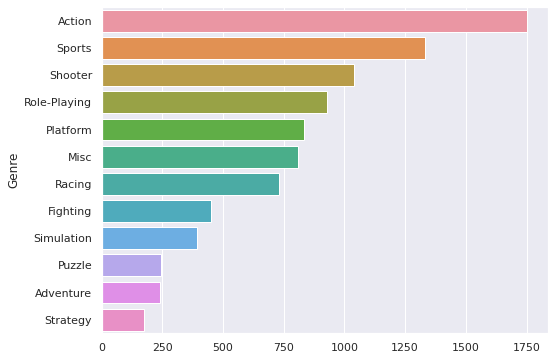

In [85]:
gg = vgs.groupby(['Genre']).sum().loc[:, 'Global_Sales'].sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = gg.index, x = gg.values, orient='h')
plt.ylabel = "Genre"
plt.xlabel = "The amount of games"
plt.show()

In [12]:
gp2 = vgs.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
gp2['NA_Sales%'] = gp2['NA_Sales']/gp2['Global_Sales']
gp2['EU_Sales%'] = gp2['EU_Sales']/gp2['Global_Sales']
gp2['JP_Sales%'] = gp2['JP_Sales']/gp2['Global_Sales']
gp2['Other_Sales%'] = gp2['Other_Sales']/gp2['Global_Sales']

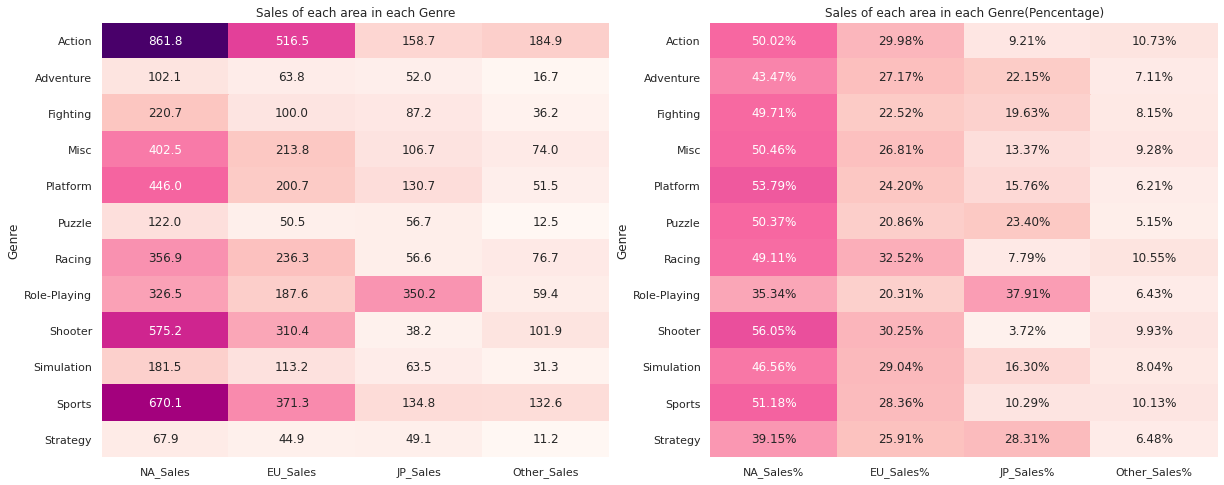

In [107]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1)
plt.subplot(121)
sns.heatmap(GenreGroup.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f',cmap='RdPu', cbar=False)
plt.title("Sales of each area in each Genre")
plt.subplot(122)
sns.heatmap(GenreGroup.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%',cmap='RdPu', cbar=False)
plt.title("Sales of each area in each Genre(Pencentage)")
plt.show()